# 損失関数

In [52]:
import numpy as np

# 二乗和誤差


def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [53]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

result1 = mean_squared_error(np.array(y1), np.array(t))
print(result1)
result2 = mean_squared_error(np.array(y2), np.array(t))
print(result2)

0.09750000000000003
0.5975


In [54]:
import numpy as np

# 交差エントロピー誤差


def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [55]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
result = cross_entropy_error(np.array(y), np.array(t))
print(result)

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
result = cross_entropy_error(np.array(y), np.array(t))
print(result)

0.510825457099338
2.302584092994546


# ミニバッチ学習

In [56]:
import sys, os

sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

# 無作為抽出
train_size = x_train.shape[0]  # 60000
batch_size = 10
batch_mask = np.random.choice(
    train_size, batch_size
)  # 0~59999の中からランダムに10個の数字を抽出
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch)
print(t_batch)

(60000, 784)
(60000, 10)
[43632  4308 31218 57651 38663 57113 33706  7159  6907 33590]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [57]:
# バッチ処理対応版 交差エントロピー誤差


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

# 数値微分

In [58]:
# 数値微分


def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

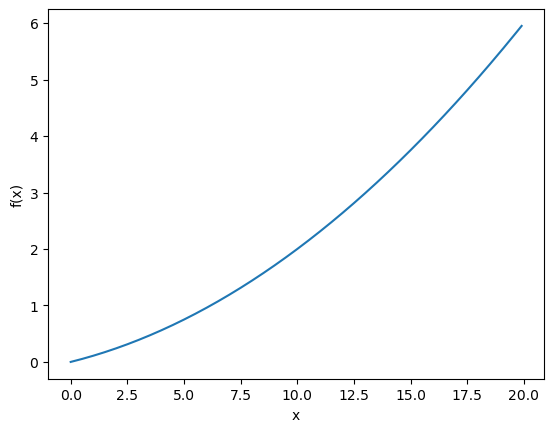

In [59]:
import matplotlib.pylab as plt
import numpy as np


def function_1(x):
    return 0.01 * x**2 + 0.1 * x


x = np.arange(0.0, 20.0, 0.1)  # 0 ~ 20.0まで、0.1刻みのx配列
y = function_1(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [60]:
result = numerical_diff(function_1, 5)
print(result)
result = numerical_diff(function_1, 10)
print(result)

0.1999999999990898
0.2999999999986347


0.1999999999990898


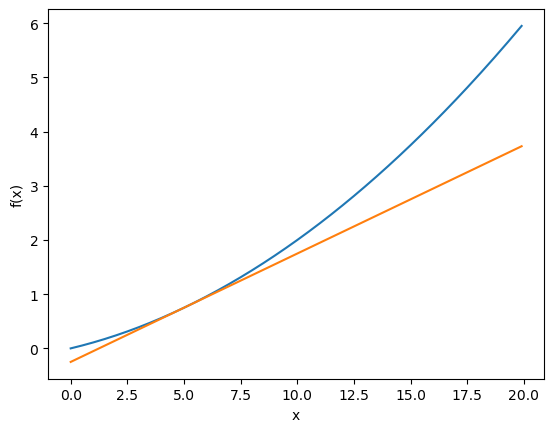

In [61]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)


def function_1(x):
    return 0.01 * x**2 + 0.1 * x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 偏微分

ある式

$$f(x_0,x_1) = x_0^2 + x_1^2$$ 

In [62]:
# ある式


def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [63]:
def function_tmp1(x0):
    return x0 * x0 + 4.0**2.0


result = numerical_diff(function_tmp1, 3.0)
print(result)


def function_tmp2(x1):
    return 3.0**2.0 + x1 * x1


result = numerical_diff(function_tmp2, 4.0)
print(result)

6.00000000000378
7.999999999999119


In [64]:
# 勾配


def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # xと同じ形状の配列を生成

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 値を元に戻す

    return grad

In [65]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

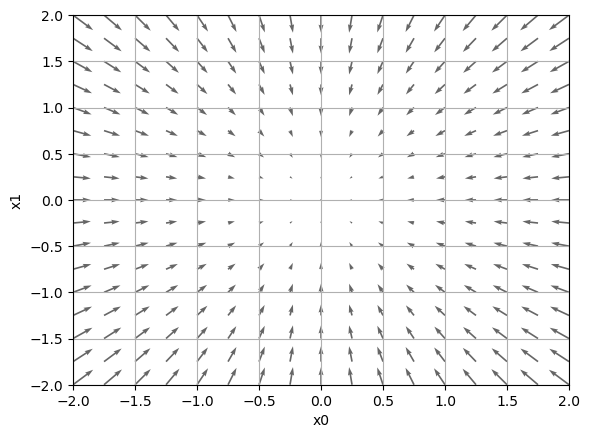

In [66]:
# 勾配の可視化
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 値を元に戻す

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


if __name__ == "__main__":
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.grid()
    plt.draw()
    plt.show()

- $f(x_0,x_1) = x_0^2 + x_1^2 $ の最小値を勾配法で求めよ

In [67]:
import numpy as np


def gradient_descent(f, init_x, lr=0.01, step_num=100000):
    x = init_x  # 初期位置

    for i in range(step_num):
        tmp = x
        grad = numerical_gradient(f, x)
        print(x)
        x -= lr * grad
        if (x == tmp).all():
            return x

    return x


def function_2(x):
    return x[0] ** 2 + x[1] ** 2


init_x = np.array([-3.0, 4.0])  # 初期位置
gradient_descent(function_2, init_x)

[-3.  4.]


array([-2.94,  3.92])

# ニューラルネットワークに対する勾配

$
W = 
\begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
\end{pmatrix}
$


$
\dfrac{\delta L}{\delta W} = 
\begin{pmatrix}
\frac{\delta L}{\delta w_{11}} & \frac{\delta L}{\delta w_{12}} & \frac{\delta L}{\delta w_{13}} \\
\frac{\delta L}{\delta w_{21}} & \frac{\delta L}{\delta w_{22}} & \frac{\delta L}{\delta w_{23}} \\
\end{pmatrix}
$

例えば、形状が2x3の重みWだけを持つニューラルネットワークがあり、損失関数をLで表す場合を考えよう。
この場合、勾配は $\frac{\delta L}{\delta W}$ と表すことができる。実際に数式で表すと、上式のようになる。

In [68]:
import sys, os

sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # ガウス分布で初期化

    def predict(self, x):
        """予測結果を返す"""
        return np.dot(x, self.W)

    def loss(self, x, t):
        """損失関数の計算結果を求める"""
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)  # 損失関数による値

        return loss

In [69]:
net = simpleNet()
print(net.W)  # 重みパラメータ -> __init__にてガウス分布で初期化済みの値

[[-0.3283766   0.31240101  1.44864738]
 [ 0.33308484  0.31948234  0.3030207 ]]


In [70]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[0.1027504  0.47497471 1.14190705]


In [71]:
t = np.array([0, 0, 1])  # 正解ラベル(one-hot表現)
net.loss(x, t)

0.6243506882930291

In [72]:
def f(W):
    return net.loss(x, t)


dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.11368392  0.16495064 -0.27863455]
 [ 0.17052587  0.24742595 -0.41795183]]


# 学習アルゴリズムの実装(総まとめ)

## 前提
- 学習 : 重みとバイアスを訓練データに適用するように調整することを学習という。
- ニューラルネットワークの学習は次の4つの手順で行う

    1. ミニバッチ
    
        訓練データの中からランダムに一部のデータを選び出す。
        その選ばれたデータをミニバッチといい、ここではそのミニバッチの損失関数の値を減らすことを目的とする。

    1. 勾配の算出

        ミニバッチの損失関数を減らすために、各重みパラメータの勾配を求める。
        勾配は、損失関数の値を最も減らす方向を示す。

    1. パラメータの更新

        重みパラメータを勾配方向に微小量だけ更新する

    1. 繰り返す

        1,2,3のステップを繰り返します。

# 2層ニューラルネットワークを一つのクラスとして実装する

In [73]:
import sys, os

sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:入力データ, y:教師データ
    def loss(self, x, t):
        """損失関数の値を返す関数"""
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}  # 勾配

        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

        return grads

In [74]:
net = TwoLayerNet(
    input_size=784, hidden_size=100, output_size=10
)  # 入力層784,隠れ層100,出力層10
result = net.params["W1"].shape  # (784, 100)
print(result)
result = net.params["b1"].shape
print(result)
result = net.params["W2"].shape
print(result)
result = net.params["b2"].shape

(784, 100)
(100,)
(100, 10)


# ミニバッチ学習

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 3.1 μs
train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7863833333333333, 0.7896
train acc, test acc | 0.8753166666666666, 0.8784
train acc, test acc | 0.8968, 0.8997
train acc, test acc | 0.90715, 0.9105
train acc, test acc | 0.9127166666666666, 0.9152
train acc, test acc | 0.9187333333333333, 0.9196
train acc, test acc | 0.9234666666666667, 0.925
train acc, test acc | 0.9275333333333333, 0.9289
train acc, test acc | 0.9302, 0.9301
train acc, test acc | 0.9327333333333333, 0.934
train acc, test acc | 0.93655, 0.9366
train acc, test acc | 0.9379833333333333, 0.9384
train acc, test acc | 0.9419, 0.9397
train acc, test acc | 0.9433833333333334, 0.9414
train acc, test acc | 0.9452666666666667, 0.9439
train acc, test acc | 0.94725, 0.9463
train acc, test acc | 0.9488166666666666, 0.9483
train acc, test acc | 0.9497833333333333, 0.9485
train acc, test acc | 0.9514333333333334, 0.9497
train acc, test acc | 0.952566666666666

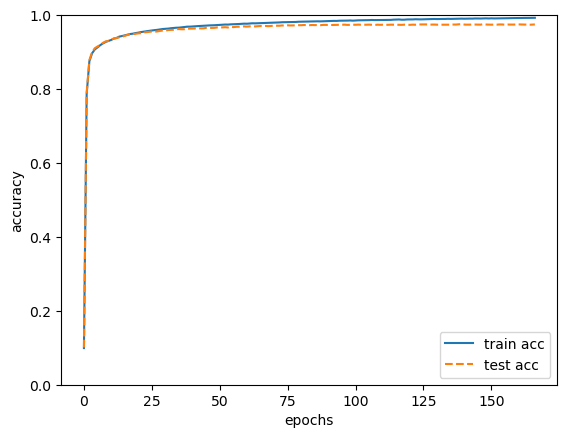

In [79]:
%time
import sys,os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

iters_num = 100000
train_size = x_train.shape[0] # 60000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 何回のイテレーションで1エポックとなるか
iter_per_epoch = max(train_size / batch_size,1) # 最低でも1になるようにしている

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配計算
    # grad = network.numerical_gradient(x_batch,t_batch)
    grad = network.gradient(x_batch,t_batch) # 高速版！

    # パラメータの更新
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

    # エポック
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        # 1エポックごとにモデルの精度を抽出
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc)) 


# グラフの描画
markers = {'train':"o",'test':'s'}
x = np.arange(len(train_acc_list))
plt.plot(x,train_acc_list,label="train acc")
plt.plot(x,test_acc_list,label="test acc",linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1.0)
plt.legend(loc='lower right')
plt.show()